### Name : Varaun Gandhi

In [2]:
# import necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import random
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import bigrams, trigrams
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer, WordNetLemmatizer
import missingno as msno
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('complaints.csv', encoding='ISO-8859-1')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,FactorTrust run by XXXX have another consumer ...,NaN,Factor Trust,OH,44708,NaN,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7059212
1,6/1/23,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"To Whom It May Concern, I purchased an XXXX a...",NaN,GOLDMAN SACHS BANK USA,CA,92308,Older American,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7059423
2,6/1/23,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,"Hello, My name is XXXX XXXX. \n\nI am trying t...",NaN,SN SERVICING CORPORATION,MD,208XX,Older American,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7055447
3,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,n accordance with the fair credit Reporting ac...,NaN,"EQUIFAX, INC.",OH,44224,NaN,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7054855
4,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,I reviewed my Consumer Reports and noticed tha...,NaN,"EQUIFAX, INC.",FL,33186,NaN,Consent provided,Web,6/1/23,Closed with non-monetary relief,Yes,NaN,7054955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42759 entries, 0 to 42758
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 42759 non-null  object 
 1   Product                       42759 non-null  object 
 2   Sub-product                   42759 non-null  object 
 3   Issue                         42759 non-null  object 
 4   Sub-issue                     40225 non-null  object 
 5   Consumer complaint narrative  42759 non-null  object 
 6   Company public response       29920 non-null  object 
 7   Company                       42759 non-null  object 
 8   State                         42640 non-null  object 
 9   ZIP code                      42759 non-null  object 
 10  Tags                          4543 non-null   object 
 11  Consumer consent provided?    42759 non-null  object 
 12  Submitted via                 42759 non-null  object 
 13  D

<Axes: >

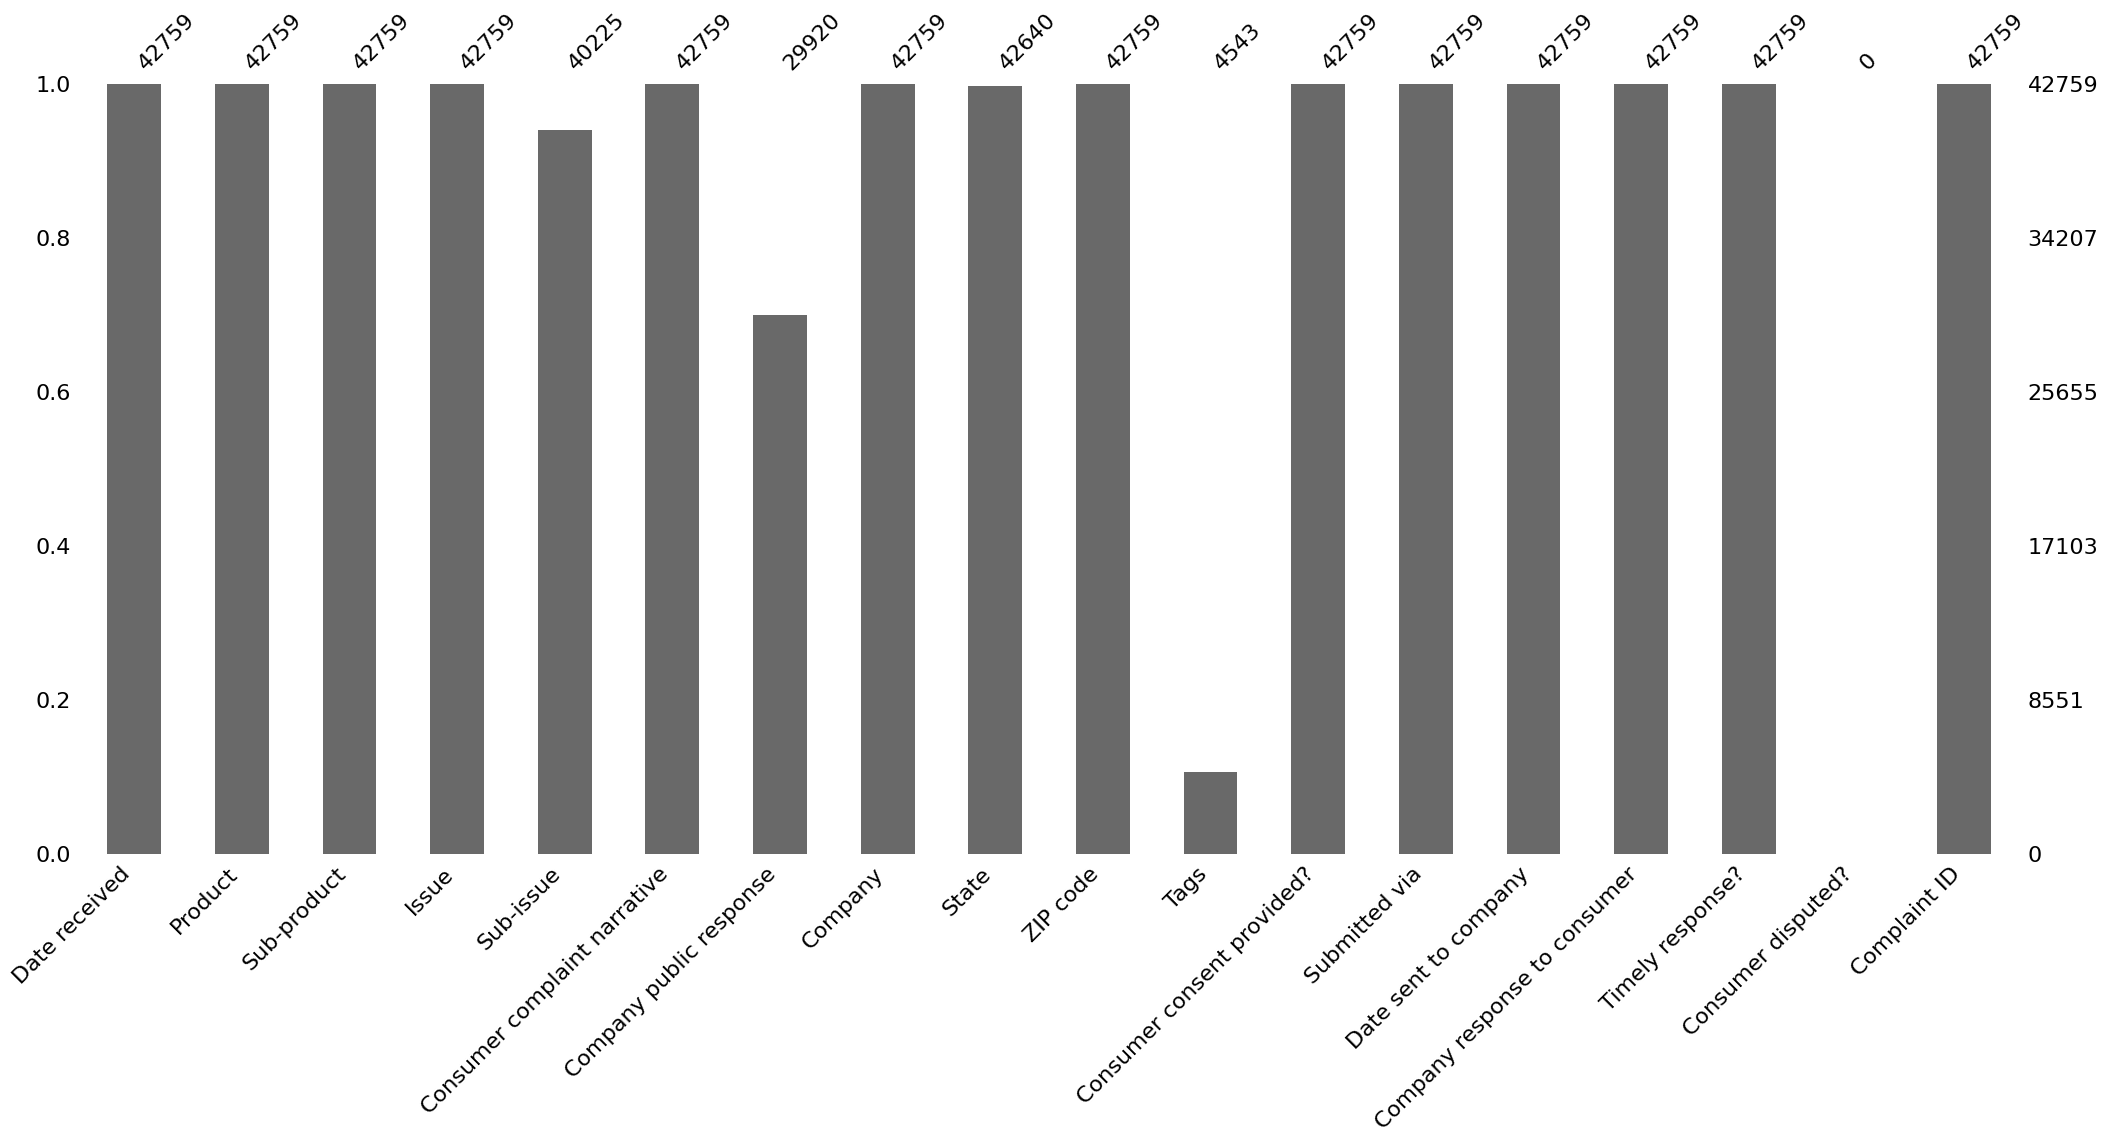

In [5]:
# calculate the number of missing values in each column
msno.bar(df)

In [6]:
# convert text in "Consumer complaint narrative" to lowercase   
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.lower()
df['Consumer complaint narrative'].head()

0    factortrust run by xxxx have another consumer ...
1    to whom it may concern, i purchased an xxxx  a...
2    hello, my name is xxxx xxxx. \n\ni am trying t...
3    n accordance with the fair credit reporting ac...
4    i reviewed my consumer reports and noticed tha...
Name: Consumer complaint narrative, dtype: object

In [7]:
# remove punctuation from "Consumer complaint narrative"
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.replace('[^\w\s]', '')
df['Consumer complaint narrative'].head()

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
/var/folders/_d/07fvhvx16qj9690gst6xd02r0000gn/T/ipykernel_43862/3864735274.py:2: SyntaxWarning: invalid escape sequence '\w'
  df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.replace('[^\w\s]', '')


0    factortrust run by xxxx have another consumer ...
1    to whom it may concern, i purchased an xxxx  a...
2    hello, my name is xxxx xxxx. \n\ni am trying t...
3    n accordance with the fair credit reporting ac...
4    i reviewed my consumer reports and noticed tha...
Name: Consumer complaint narrative, dtype: object

### Tokenization

[('xxxx', 672529), ('the', 284499), ('to', 220215), ('i', 192681), ('and', 166455), ('a', 156326), ('my', 150221), ('of', 145149), ('that', 94342), ('is', 75853)]


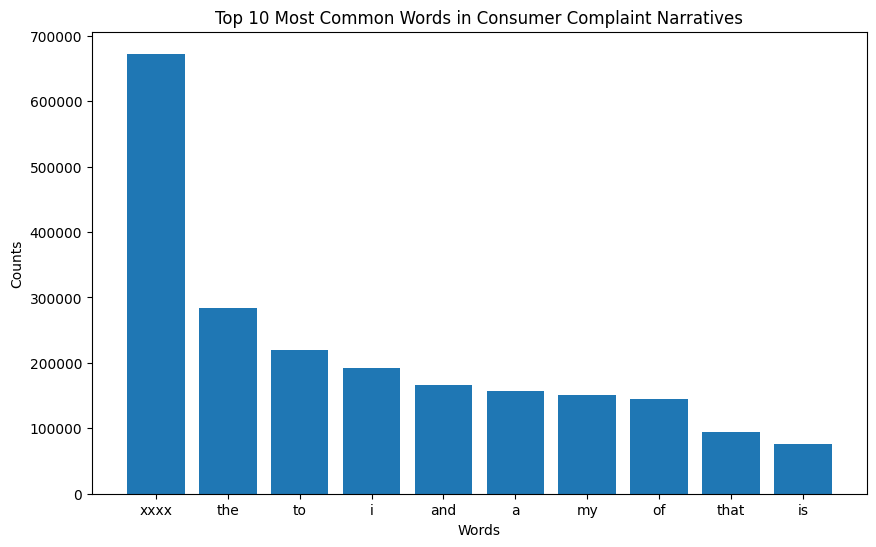

In [8]:
from collections import Counter

# concatenate all text in "Consumer complaint narrative"
all_text = ' '.join(df['Consumer complaint narrative'].dropna())

# Tokenize the text and count word frequencies
words = all_text.split()
word_counts = Counter(words)
print(word_counts.most_common(10))  # print the 10 most common words


#extracting top 10 words and their counts
top_words = [word for word, count in word_counts.most_common(10)]
top_counts = [count for word, count in word_counts.most_common(10)]

# Create a bar plot of the top 10 words
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 10 Most Common Words in Consumer Complaint Narratives')
plt.show()


In [9]:
#remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/varaungandhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# download punkt_tab
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/varaungandhi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
# Tokenize and preprocess the text data
all_narratives = ' '.join(df['Consumer complaint narrative'].dropna())
words = word_tokenize(all_narratives)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

In [12]:
print(words[:10])  # print the first 10 words after preprocessing

['factortrust', 'run', 'xxxx', 'another', 'consumer', 'report', 'copies', 'reported', 'information', 'mine']


In [13]:
# Create bigrams (pairs of words) and trigrams (triplets of words).
# Helps capture common expressions and product associations.
bigram_list = list(bigrams(words))
trigram_list = list(trigrams(words))

# Calculate frequencies of bigrams and trigrams
bigram_freq = FreqDist(bigram_list)
trigram_freq = FreqDist(trigram_list)

# Print most common bigrams and trigrams
print("Top 10 most common bigrams:")
print(bigram_freq.most_common(10))

print("\nTop 10 most common trigrams:")
print(trigram_freq.most_common(10))

Top 10 most common bigrams:
[(('xxxx', 'xxxx'), 559935), (('credit', 'report'), 24979), (('consumer', 'reporting'), 17712), (('reporting', 'agency'), 16557), (('xxxx', 'account'), 13009), (('credit', 'reporting'), 11972), (('consumer', 'report'), 10043), (('identity', 'theft'), 9651), (('xxxx', 'balance'), 8834), (('states', 'consumer'), 8775)]

Top 10 most common trigrams:
[(('xxxx', 'xxxx', 'xxxx'), 475042), (('consumer', 'reporting', 'agency'), 15844), (('states', 'consumer', 'reporting'), 8519), (('fair', 'credit', 'reporting'), 8503), (('credit', 'reporting', 'act'), 8419), (('xxxx', 'xxxx', 'balance'), 7787), (('xxxx', 'xxxx', 'account'), 7416), (('balance', 'xxxx', 'xxxx'), 6229), (('account', 'number', 'xxxx'), 5828), (('xxxx', 'balance', 'xxxx'), 5799)]


In [14]:
import string

# 1) Keep names consistent
frequent_words = {"xxxx"}  # single words to drop
frequent_phrases = [
    "account number", "credit card", "customer service",
    "phone number", "social security number"
]

# 2) Punctuation/dashes to remove
PUNCT = string.punctuation + "—–“”’‘…•"

def remove_frequent(text):
    if not isinstance(text, str):
        return ""

    # lower & remove punctuation/dashes by translating them to spaces
    t = text.lower()
    t = t.translate(str.maketrans({ch: " " for ch in PUNCT}))

    # remove multi-word phrases first (now that punctuation is gone)
    for ph in frequent_phrases:
        t = t.replace(ph, " ")

    # tokenize by whitespace & drop stopwords and frequent words
    tokens = [w for w in t.split() if (w not in frequent_words and w not in stop_words)]

    # collapse extra spaces
    return " ".join(tokens)

# Apply
df["Consumer complaint narrative"] = (
    df["Consumer complaint narrative"].astype(str).apply(remove_frequent)
)

In [15]:
# Extract 5 random samples
sample_df = df.sample(n=5)

sample_complaint = []
for i, row in sample_df.iterrows():
    tweet = f"Complaint {i+1}: {row['Consumer complaint narrative']}"
    sample_complaint.append(tweet)
print('\n\n'.join(sample_complaint))

Complaint 42756: following inquiries mine never gave permission authorization pull credit

Complaint 18783: accordance fair credit reporting act list accounts violated federally protected consumer rights privacy confidentiality 15 usc 1681 told equifax reinvestigate accounts xxxxxxxx however stated everything complete accurate possible open date date last activity much incorrect according 15 usc 1681 5 suppose modify accounts reporting correctly 15 u c 1681 section 602 states right privacy 15 u c 1681 section 604 section 2 also states consumer reporting agency furnish account without written instructions 15 u c 1681c 5 section states consumer reporting agency may make consumer report containing following items information adverse item information records convictions crimes antedates report seven years 15 u c 1681s 2 1 person shall furnish information relating consumer consumer reporting agency person knows reasonable cause believe information inaccurate also even compliance metro 2 cre

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/varaungandhi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Perform stemming (using Porter Stemmer)
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]

    # Perform lemmatization (using WordNet Lemmatizer)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the processed words back into a sentence
    stemmed_text = ' '.join(stemmed_words)
    lemmatized_text = ' '.join(lemmatized_words)

    return stemmed_words, lemmatized_words

# Apply the preprocessing function to the 'Sound Bite Text' column
df['Stemmed Text'], df['Lemmatized Text'] = zip(*df['Consumer complaint narrative'].apply(preprocess_text))

In [18]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Stemmed Text,Lemmatized Text
0,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,factortrust run another consumer report copies...,NaN,Factor Trust,OH,44708,NaN,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7059212,"[factortrust, run, anoth, consum, report, copi...","[factortrust, run, another, consumer, report, ..."
1,6/1/23,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,may concern purchased ca represented card paym...,NaN,GOLDMAN SACHS BANK USA,CA,92308,Older American,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7059423,"[may, concern, purchas, ca, repres, card, paym...","[may, concern, purchased, ca, represented, car..."
2,6/1/23,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,hello name trying sell home md made payment ti...,NaN,SN SERVICING CORPORATION,MD,208XX,Older American,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7055447,"[hello, name, tri, sell, home, md, made, payme...","[hello, name, trying, sell, home, md, made, pa..."
3,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,n accordance fair credit reporting act account...,NaN,"EQUIFAX, INC.",OH,44224,NaN,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7054855,"[n, accord, fair, credit, report, act, account...","[n, accordance, fair, credit, reporting, act, ..."
4,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,reviewed consumer reports noticed late payment...,NaN,"EQUIFAX, INC.",FL,33186,NaN,Consent provided,Web,6/1/23,Closed with non-monetary relief,Yes,NaN,7054955,"[review, consum, report, notic, late, payment,...","[reviewed, consumer, report, noticed, late, pa..."


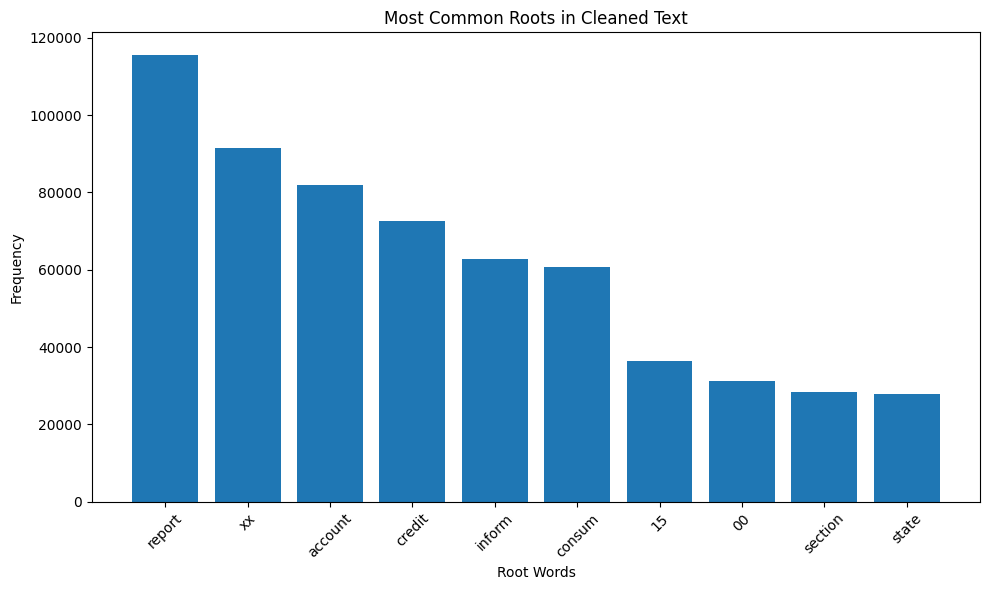

In [19]:
import matplotlib.pyplot as plt
from collections import Counter

cleaned_words_stemmed = [stem for stems_list in df['Stemmed Text'] for stem in stems_list]

# Use Counter to count the frequency of each root
word_freq = Counter(cleaned_words_stemmed)

# Get the most common roots
most_common_roots = word_freq.most_common(10)

# Extract the roots and their frequencies for plotting
roots, frequencies = zip(*most_common_roots)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(roots, frequencies)
plt.xlabel('Root Words')
plt.ylabel('Frequency')
plt.title('Most Common Roots in Cleaned Text')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/_d/07fvhvx16qj9690gst6xd02r0000gn/T/ipykernel_43862/1103059459.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.values, y=product_counts.index, palette="viridis")


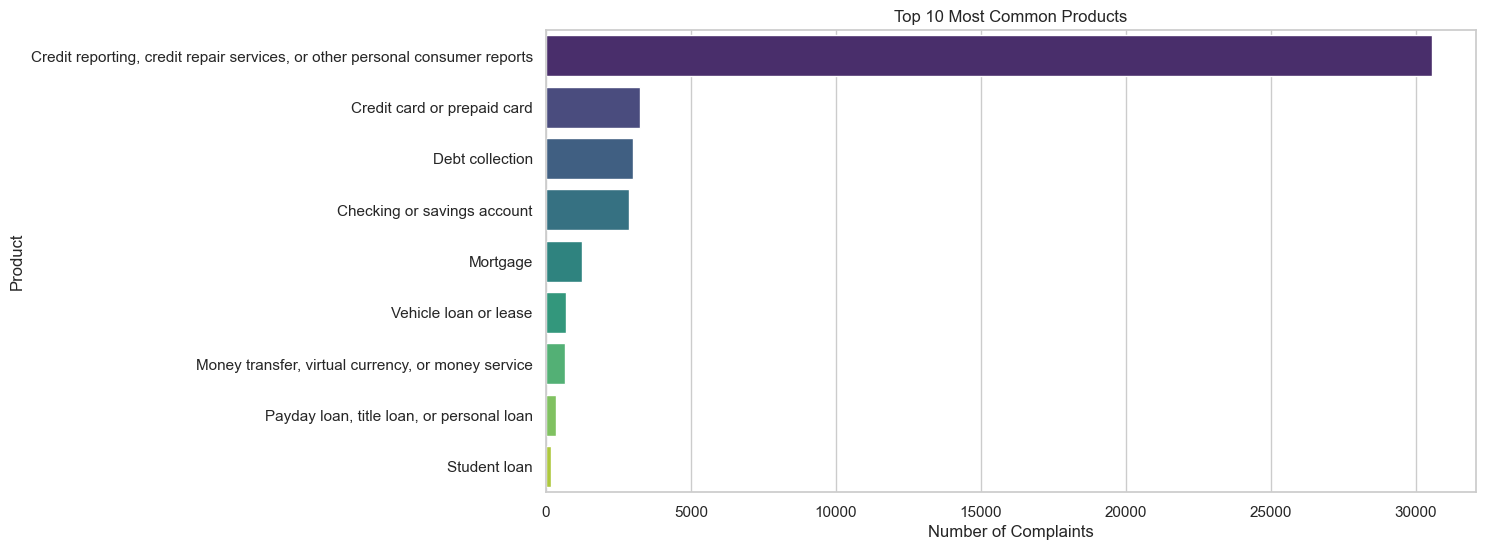

/var/folders/_d/07fvhvx16qj9690gst6xd02r0000gn/T/ipykernel_43862/1103059459.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_product_counts.values, y=sub_product_counts.index, palette="magma")


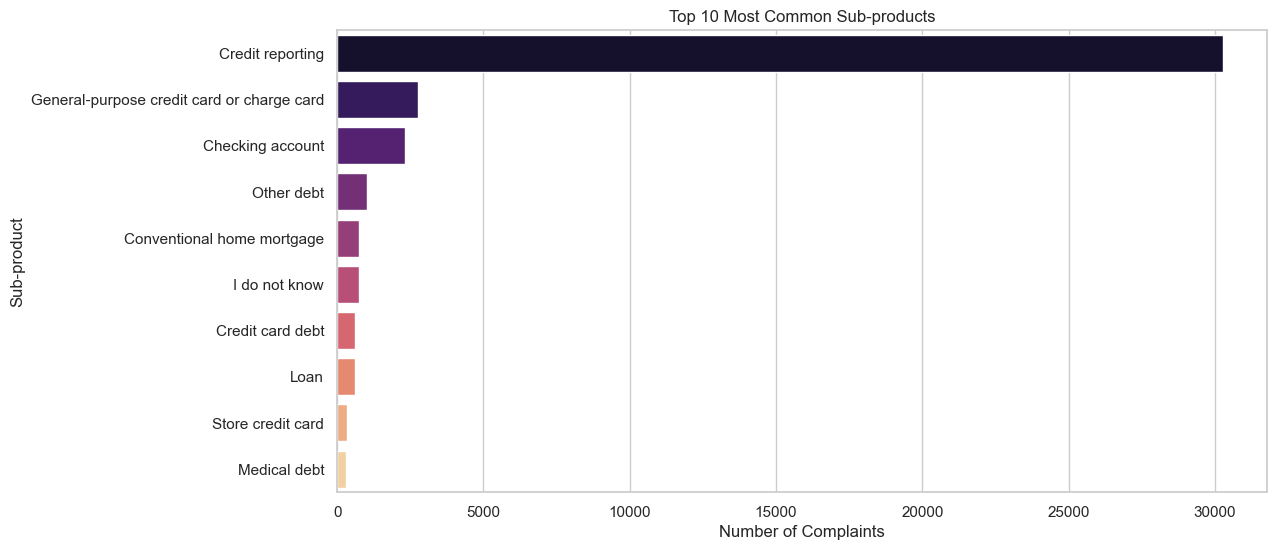

/var/folders/_d/07fvhvx16qj9690gst6xd02r0000gn/T/ipykernel_43862/1103059459.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=issue_counts.values, y=issue_counts.index, palette="plasma")


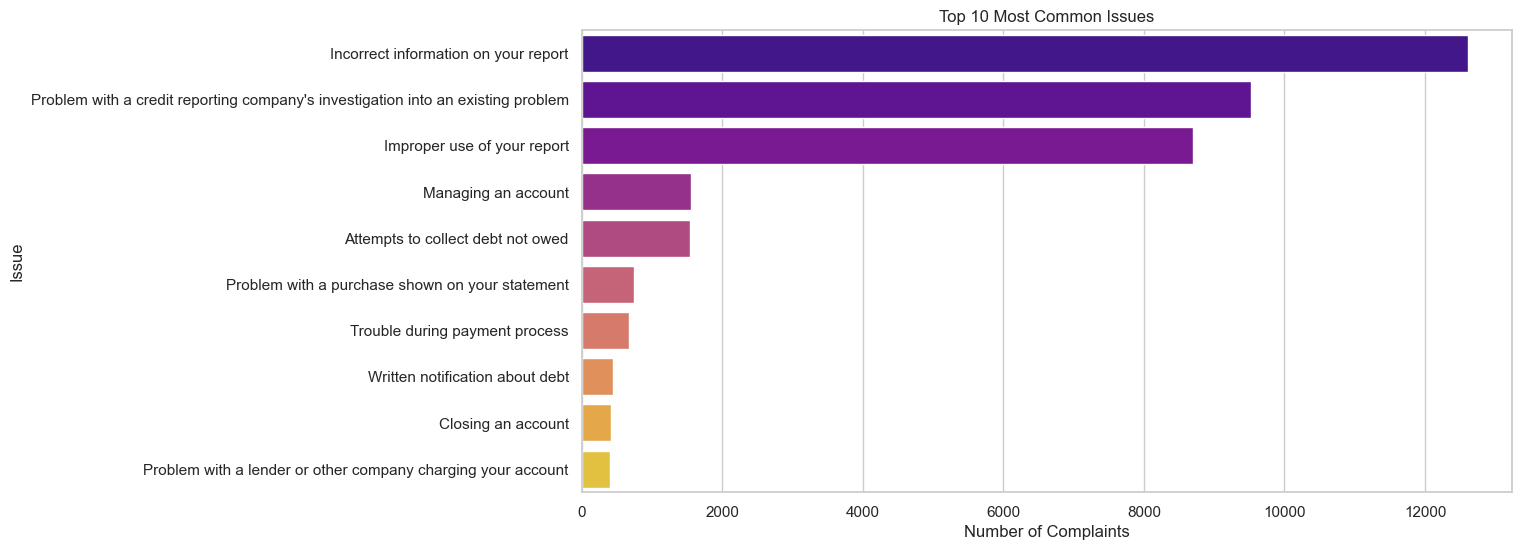

In [20]:
#10 most common consumer complaint topics based on the product, sub-product, and issue fields
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for seaborn
sns.set(style="whitegrid")
# Plot the most common products
plt.figure(figsize=(12, 6))
product_counts = df['Product'].value_counts().head(10)
sns.barplot(x=product_counts.values, y=product_counts.index, palette="viridis")
plt.title('Top 10 Most Common Products')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.show()
# Plot the most common sub-products
plt.figure(figsize=(12, 6))
sub_product_counts = df['Sub-product'].value_counts().head(10)
sns.barplot(x=sub_product_counts.values, y=sub_product_counts.index, palette="magma")
plt.title('Top 10 Most Common Sub-products')
plt.xlabel('Number of Complaints')
plt.ylabel('Sub-product')
plt.show()
# Plot the most common issues
plt.figure(figsize=(12, 6))
issue_counts = df['Issue'].value_counts().head(10)
sns.barplot(x=issue_counts.values, y=issue_counts.index, palette="plasma")
plt.title('Top 10 Most Common Issues')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue')
plt.show()

In [21]:
# Download VADER lexicon if not already installed
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/varaungandhi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(stem_list):
    stemmed_text = ' '.join(stem_list)
    return analyzer.polarity_scores(stemmed_text)['compound']

# Apply sentiment analysis to the 'Stemmed Text' column
df['Sentiment Score'] = df['Stemmed Text'].apply(get_sentiment_score)

# Define the sentiment ranges and assign scores
def assign_sentiment(score):
    if score < -0.5:
        return 1
    elif -0.5 <= score < -0.1:
        return 2
    elif -0.1 <= score < 0.1:
        return 3
    elif 0.1 <= score < 0.5:
        return 4
    else:
        return 5


df['Sentiment Score (1-5)'] = df['Sentiment Score'].apply(assign_sentiment)

In [23]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Stemmed Text,Lemmatized Text,Sentiment Score,Sentiment Score (1-5)
0,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,factortrust run another consumer report copies...,NaN,Factor Trust,OH,44708,...,Web,6/1/23,Closed with explanation,Yes,NaN,7059212,"[factortrust, run, anoth, consum, report, copi...","[factortrust, run, another, consumer, report, ...",-0.2960,2
1,6/1/23,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,may concern purchased ca represented card paym...,NaN,GOLDMAN SACHS BANK USA,CA,92308,...,Web,6/1/23,Closed with explanation,Yes,NaN,7059423,"[may, concern, purchas, ca, repres, card, paym...","[may, concern, purchased, ca, represented, car...",-0.2263,2
2,6/1/23,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,hello name trying sell home md made payment ti...,NaN,SN SERVICING CORPORATION,MD,208XX,...,Web,6/1/23,Closed with explanation,Yes,NaN,7055447,"[hello, name, tri, sell, home, md, made, payme...","[hello, name, trying, sell, home, md, made, pa...",-0.3612,2
3,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,n accordance fair credit reporting act account...,NaN,"EQUIFAX, INC.",OH,44224,...,Web,6/1/23,Closed with explanation,Yes,NaN,7054855,"[n, accord, fair, credit, report, act, account...","[n, accordance, fair, credit, reporting, act, ...",0.8442,5
4,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,reviewed consumer reports noticed late payment...,NaN,"EQUIFAX, INC.",FL,33186,...,Web,6/1/23,Closed with non-monetary relief,Yes,NaN,7054955,"[review, consum, report, notic, late, payment,...","[reviewed, consumer, report, noticed, late, pa...",0.5845,5


In [24]:
# Group by sentiment rating
grouped = df.groupby('Sentiment Score (1-5)')

# Define a function to select two samples from each group
def get_two_samples(group):
    return group.sample(n=2)

# Apply the function to each group and concatenate the results
samples = grouped.apply(get_two_samples).reset_index(drop=True)

# Display the result
print(samples[['Sentiment Score (1-5)', 'Consumer complaint narrative']])

   Sentiment Score (1-5)                       Consumer complaint narrative
0                      1  name complaint made error neither made third p...
1                      1  bridgecrest allowed opening car loan xx xx unf...
2                      2  paid service ended service tried charge equipm...
3                      2  called midland credit management spoke someone...
4                      3  attached ftc report unauthorized fraudulent in...
5                      3  charged extra months payment late fees bank cl...
6                      4  requesting regards inaccurate unknown accounts...
7                      4  list accounts violated federally protected con...
8                      5  dear tx equifax ga xxxxxxxx pa writing inform ...
9                      5  open two accounts need get two accounts remove...


/var/folders/_d/07fvhvx16qj9690gst6xd02r0000gn/T/ipykernel_43862/1196734182.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples = grouped.apply(get_two_samples).reset_index(drop=True)


In [25]:
# Ratings and Complaints only 5 samples
sampled_df = df.sample(n=5)
for index, row in sampled_df.iterrows():
    print(f"Sentiment Score (1-5): {row['Sentiment Score (1-5)']}")
    print(f"Consumer complaint narrative: {row['Consumer complaint narrative']}\n")

Sentiment Score (1-5): 2
Consumer complaint narrative: endeavor tell victim identity theft complain question specific records document coming wrongdoing records questioning connect exchanges acquiring possession goods services money made authorized assuming one cares either way block noteworthy information credit record came due alleged fraud extortion sc ga balance 10000 00 balance 0 00 original creditor az balance 5500 00 sc sc balance 10000 00 balance 1200 00 original creditor az balance 5500 00 original creditor 80 00 original creditor 650 00 xx xx xx xx sc georgia ga balance 10000 00 balance 0 00 original creditor az balance 5500 00

Sentiment Score (1-5): 4
Consumer complaint narrative: accordance fair credit reporting act list accounts violated federally protected consumer rights privacy confidentiality 15 usc 1681 letters stated items issues 15 u c 1681 section 602 states right privacy 15 u c 1681 section 604 section 2 also states consumer reporting agency furnish account witho

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Step 1: Feature Extraction

# max_features=1000 is set to limit the number of features to the top 1000 most important terms on TF-IDF scores
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Consumer complaint narrative'])


# Step 2: Model Selection (Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Step 3: Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment Score (1-5)'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}\n")

# Step 4: Top Features for Each Sentiment Rating
feature_names = vectorizer.get_feature_names_out()
top_features = {}
for i in range(1, 6):
    coef = model.coef_[i-1]
    top_features[i] = [feature_names[j] for j in coef.argsort()[:-10-1:-1]]

# Print top features for each sentiment rating
for sentiment, features in top_features.items():
    print(f"Sentiment Rating {sentiment}: {', '.join(features)}")

# Step 5: Display complaints and Predictions
complaints = df['Consumer complaint narrative'].sample(n=5)  # Choose 5 random complaints for demonstration

complaints_X = vectorizer.transform(complaints)
predictions = model.predict(complaints_X)

for i, (complaint, prediction) in enumerate(zip(complaints, predictions)):
    print(f"\nComplaint {i+1}: {complaint}")
    print(f"Predicted Sentiment Rating: {prediction}\n")


Accuracy: 0.7680074836295603

Sentiment Rating 1: fraud, failed, debt, complaint, stress, scam, block, wrong, unfair, error
Sentiment Rating 2: complaint, fraud, wrong, stolen, debt, block, failed, error, victim, unacceptable
Sentiment Rating 3: shown, business, claimed, investigation, 1666b, violating, files, finally, bureau, 6802
Sentiment Rating 4: credit, pursue, list, confidentiality, ground, influence, 611, accordance, protected, report
Sentiment Rating 5: credit, interest, fair, agreement, best, help, support, tx, like, thank

Complaint 1: usaa decided close accounts prevent access 8000 00 demand deposit 60 days results wire transfers made determined sent scammer determine funds deposited account legitimate coming government deposits va ssa loan xxxxxxxx disbursement ira sale automobile dealer wire transfers domestic corporation legitimate investment far knew money laundering illegal transaction usaa breach xx xx lasting xx xx report depositers appears 7500 00 missing wire trans

In [29]:
# Calling the model and the prompt

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0,
    )
    return(response.choices[0].message.content)

In [30]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Stemmed Text,Lemmatized Text,Sentiment Score,Sentiment Score (1-5)
0,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,factortrust run another consumer report copies...,NaN,Factor Trust,OH,44708,...,Web,6/1/23,Closed with explanation,Yes,NaN,7059212,"[factortrust, run, anoth, consum, report, copi...","[factortrust, run, another, consumer, report, ...",-0.2960,2
1,6/1/23,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,may concern purchased ca represented card paym...,NaN,GOLDMAN SACHS BANK USA,CA,92308,...,Web,6/1/23,Closed with explanation,Yes,NaN,7059423,"[may, concern, purchas, ca, repres, card, paym...","[may, concern, purchased, ca, represented, car...",-0.2263,2
2,6/1/23,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,hello name trying sell home md made payment ti...,NaN,SN SERVICING CORPORATION,MD,208XX,...,Web,6/1/23,Closed with explanation,Yes,NaN,7055447,"[hello, name, tri, sell, home, md, made, payme...","[hello, name, trying, sell, home, md, made, pa...",-0.3612,2
3,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,n accordance fair credit reporting act account...,NaN,"EQUIFAX, INC.",OH,44224,...,Web,6/1/23,Closed with explanation,Yes,NaN,7054855,"[n, accord, fair, credit, report, act, account...","[n, accordance, fair, credit, reporting, act, ...",0.8442,5
4,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,reviewed consumer reports noticed late payment...,NaN,"EQUIFAX, INC.",FL,33186,...,Web,6/1/23,Closed with non-monetary relief,Yes,NaN,7054955,"[review, consum, report, notic, late, payment,...","[reviewed, consumer, report, noticed, late, pa...",0.5845,5


In [35]:
# Extract 5 random samples
sample_df = df.sample(n=5)

sample_complaints = []
for i, row in sample_df.iterrows():
    complaint = f"Complaint {i+1}: {row['Consumer complaint narrative']}"
    sample_complaints.append(complaint)

# Combine the sample complaints into a single string called 'prompt'
sample_details = '\n\n'.join(sample_complaints)
print(sample_details)

Complaint 7168: submitting cfpb complaint request experian correct information report following accounts inaccurate different compared credit bureaus experian reporting different information bureaus accounts reporting late experian credit bureau experian record keeping accurate account never erroneously reported per fcra reporting account information must accurate need following accounts corrected immediately xxxxxxxx balance 94000 00 balance 2800 00 balance 2300 00 per fcra credit reporting must 100 accurate therefore urge experian rectify error correcting information report accounts credit report soon possible avoid negative impact creditworthiness

Complaint 6308: xx xx 2023 come attention included unfavorable remark credit report indicated want assert account fraudulent never associated upon conducting thorough investigation become evident account transferred sold bear responsibility fraudulent activity additionally credit agency responsible collection failed verify legitimacy writ

In [37]:
# Extra question 2

prompt = f"""
Your task is to generate a 1-2 sentence summary of the key issues
given in the sample complaints below:
```{sample_details}```
"""
response = get_completion(prompt)
print(response)

The key issues in the sample complaints include inaccurate reporting of accounts by Experian, fraudulent account inclusion in credit report, incorrect personal information on credit report, request for deletion of unauthorized credit inquiries, and the need for credit bureaus to confirm and fix errors in credit reports.


In [38]:
low_sentiment_complaint = df[df['Sentiment Score (1-5)'] == 1]
selected_indices = random.sample(list(low_sentiment_complaint.index), 10)
selected_complaints = low_sentiment_complaint.loc[selected_indices, 'Consumer complaint narrative'].tolist()

sample_details = "\n\n".join([f"Complaint {i + 1}: {complaint}" for i, complaint in enumerate(selected_complaints)])

In [39]:
# Extra question 2

prompt = f"""
Your task is to explain why the customer of the complaint was unhappy or provide constructive feedback to improve the situation. in the sample text delimited by triple backticks below:
```{sample_details}```
"""
response = get_completion(prompt)
print(response)

Complaint 1: The customer is unhappy because they believe their rights under the Fair Credit Reporting Act (FCRA) were violated. They are requesting that all information on their credit report be 100% accurate and that any disputed debts be verified properly. To improve the situation, the consumer reporting agencies should ensure that they exercise their responsibilities with fairness, impartiality, and respect for consumers' privacy rights. They should also follow the procedures outlined in the FCRA for handling disputed debts and providing accurate information on credit reports.

Complaint 2: The customer is frustrated because they have been unable to get Equifax to provide an explanation for the negative information on their credit report. They are also concerned about the accuracy of the information being furnished. To address this issue, Equifax should provide clear explanations for the negative information on the customer's report and ensure that all information being reported is

In [40]:
#  Extra question 3

prompt = f"""
Your task is to analyze the text and identify predictive
words and themes for each rating
```{sample_details}```
"""
response = get_completion(prompt)
print(response)

Predictive words and themes for each rating:

Rating 1: Fair Credit Reporting Act, federally protected consumer rights, privacy, accuracy, verification, debt collection, consumer reporting agencies, consumer rights, investigation.

Rating 2: Equifax, identity verification, negative information, payments, credit accounts, information furnishing, identity verification.

Rating 3: Denial of complaint, credit report errors, written consent, fraud, consumer reports, permissible purposes.

Rating 4: Error complaint, unauthorized use, penalty perjury, identity theft, fraud, unauthorized accounts, consumer reports, written consent.

Rating 5: Identity theft, fraudulent accounts, debt removal, uncooperative, victimization, consumer reporting agency, identity theft victim, deletion of information.

Rating 6: Bankruptcy error, incorrect information, date of birth, identity theft, incorrect reporting, dispute, Experian.

Rating 7: Tax refund, debit card, fraudsters, stolen cards, cash transactions